# Lectura y gráfica de un EEG

#### importación de libreriasa

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re
from scipy import signal

#### Abrir archivo txt

In [3]:
f = open("Archivos_EEG/EEG_BITalino/EEG_Toma1.txt","r")
raw_data = f.readlines()[1] # con f.read() leemos todo el contenido
f.close()

raw_data

'# {"98:D3:81:FD:6D:86": {"position": 0, "device": "bitalino_rev", "device name": "98:D3:81:FD:6D:86", "device connection": "BTH98:D3:81:FD:6D:86", "sampling rate": 100, "resolution": [4, 1, 1, 1, 1, 10], "firmware version": 1282, "comments": "", "keywords": "", "mode": 0, "sync interval": 2, "date": "2023-9-29", "time": "10:14:2.587", "channels": [4], "sensor": ["EEGBITREV"], "label": ["A4"], "column": ["nSeq", "I1", "I2", "O1", "O2", "A4"], "special": [{}], "digital IO": [0, 0, 1, 1]}}\n'

In [5]:
x = re.findall("[0-5][0-9]\d", raw_data)

print(x)

['100', '128', '202', '587']


In [8]:
Fs = float(x[0])
Fs =  Fs*10
Ts=1/Fs

print(f" Fs={Fs} hz\n Ts={Ts} s")

 Fs=1000.0 hz
 Ts=0.001 s


#### Leer archivo excluyendo encabezado

In [9]:
SenalEEG = np.genfromtxt("Archivos_EEG/EEG_BITalino/EEG_Toma1.txt", delimiter="\t",skip_header = 3)
SenalEjercicio = np.genfromtxt("Archivos_EEG/EEG_BITalino/EEG_Toma2_ejercicios.txt", delimiter="\t", skip_header=3)

### Visualización de la señal

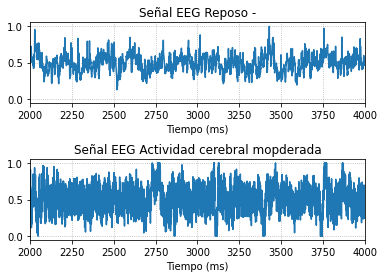

In [11]:
# Conversión de la señal a un array
y1 = (SenalEEG[:, 5]) #Señal de EEG con actividad cerebral miníma
y2 = (SenalEjercicio[:, 5]) #Señal de EEG con actividad cerebral moderada

# Normalización de la señal EEG en reposo
y1 = y1  - np.min(y1)
y1 = y1 / np.max(y1)
t1 = (np.arange(0,len(y1)) / Fs)


#Señal Después de actividad cerebral moderada - Normalizacion
y2 = y2 - np.min(y2)
y2 = y2 / np.max(y2)
t2 = (np.arange(0,len(y2)) / Fs)


#Graficos señales
plt.figure()
plt.subplot(2,1,1)
plt.subplots_adjust(hspace=0.7)
plt.plot(y1, label="señal Reposo") 
plt.title("Señal EEG Reposo -")    # graficamos la señal
plt.grid(linestyle=":")
plt.xlabel("Tiempo (ms)")
plt.xlim(2000,4000)

plt.subplot(2,1,2)
plt.plot(y2, label="Señal EEG Actividad cerebral mopderada")  
plt.title("Señal EEG Actividad cerebral mopderada")    # graficamos la señal
plt.grid(linestyle=":")
plt.xlabel("Tiempo (ms)")
plt.xlim(2000,4000)

fig = plt.gcf()
fig.set_facecolor('white')
#plt.savefig('ECG_Sujeto1_comparison.png', transparent=False, )
plt.show()

### Análisis del dominio de la frecuencia del EEG

In [ ]:
# Aplicamos FFT a la primera señal
X1 = np.fft.fft(y1)
X1 = np.abs(X1)
N1 = len(y1)
f1 = (Fs) * (np.arange(1,N1+1)/N1)

#Aplicamos FFT a la segunda señal

X2 = np.fft.fft(y2)
X2 = np.abs(X2)
N2 = len(y2)
f2 = (Fs)* (np.arange(0,(int)(N2/2)+1))

#Graficamos el dominio del tiempo de ambas señales